**Issue#3 - Traversal of the space of train/test splits.**

Fix for #3: https://github.com/mozilla/PRESC/issues/3

In this notebook, we will do train-test splits experiment and see how the accuracy of the model varies. we will use SVM classifier

**References:**
1. https://scikit-learn.org

In [1]:
# Ignore all the future warning and deprecation warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
pd.set_option("display.precision", 2) 
    
from sklearn.model_selection import GridSearchCV
from issue3_helper import test_train_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [2]:
# Read the data
df = pd.read_csv("../../datasets/vehicles.csv")

In [3]:
# Set Feature and Label Column
feature_cols = ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR']
label_col = ['Class']

In [4]:
df[df['SKEWNESS_ABOUT_MAJOR'] >= 88].sort_values(by='SKEWNESS_ABOUT_MAJOR', ascending=False)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
388,94,47,85,333,138,49,155,43,19,155,320,354,187,135,12,9,188,196,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
100,82,45,66,252,126,52,148,45,19,144,237,326,185,119,1,1,181,185,bus
37,90,48,86,306,126,49,153,44,19,156,272,346,200,118,0,15,185,194,van
706,82,43,70,250,105,55,139,48,18,145,231,289,172,99,4,9,190,199,van
135,89,47,83,322,133,48,158,43,20,163,229,364,176,97,0,14,184,194,van
523,90,43,81,231,97,46,150,45,19,149,200,332,164,91,5,9,186,196,van
291,89,45,81,246,102,43,155,44,20,160,200,347,177,90,9,17,183,192,van
655,86,35,44,110,54,2,119,57,17,121,139,208,137,90,6,1,180,183,van
230,85,35,47,110,55,3,117,57,17,122,136,203,139,89,5,9,180,184,van


In [5]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
COMPACTNESS,846.0,93.68,8.23,73.0,87.00,93.0,100.0,119.0
CIRCULARITY,846.0,44.86,6.17,33.0,40.00,44.0,49.0,59.0
DISTANCE_CIRCULARITY,846.0,82.09,15.77,40.0,70.00,80.0,98.0,112.0
RADIUS_RATIO,846.0,168.94,33.47,104.0,141.00,167.0,195.0,333.0
PR.AXIS_ASPECT_RATIO,846.0,61.69,7.89,47.0,57.00,61.0,65.0,138.0
MAX.LENGTH_ASPECT_RATIO,846.0,8.57,4.60,2.0,7.00,8.0,10.0,55.0
SCATTER_RATIO,846.0,168.84,33.24,112.0,146.25,157.0,198.0,265.0
ELONGATEDNESS,846.0,40.93,7.81,26.0,33.00,43.0,46.0,61.0
PR.AXIS_RECTANGULARITY,846.0,20.58,2.59,17.0,19.00,20.0,23.0,29.0
MAX.LENGTH_RECTANGULARITY,846.0,148.00,14.52,118.0,137.00,146.0,159.0,188.0


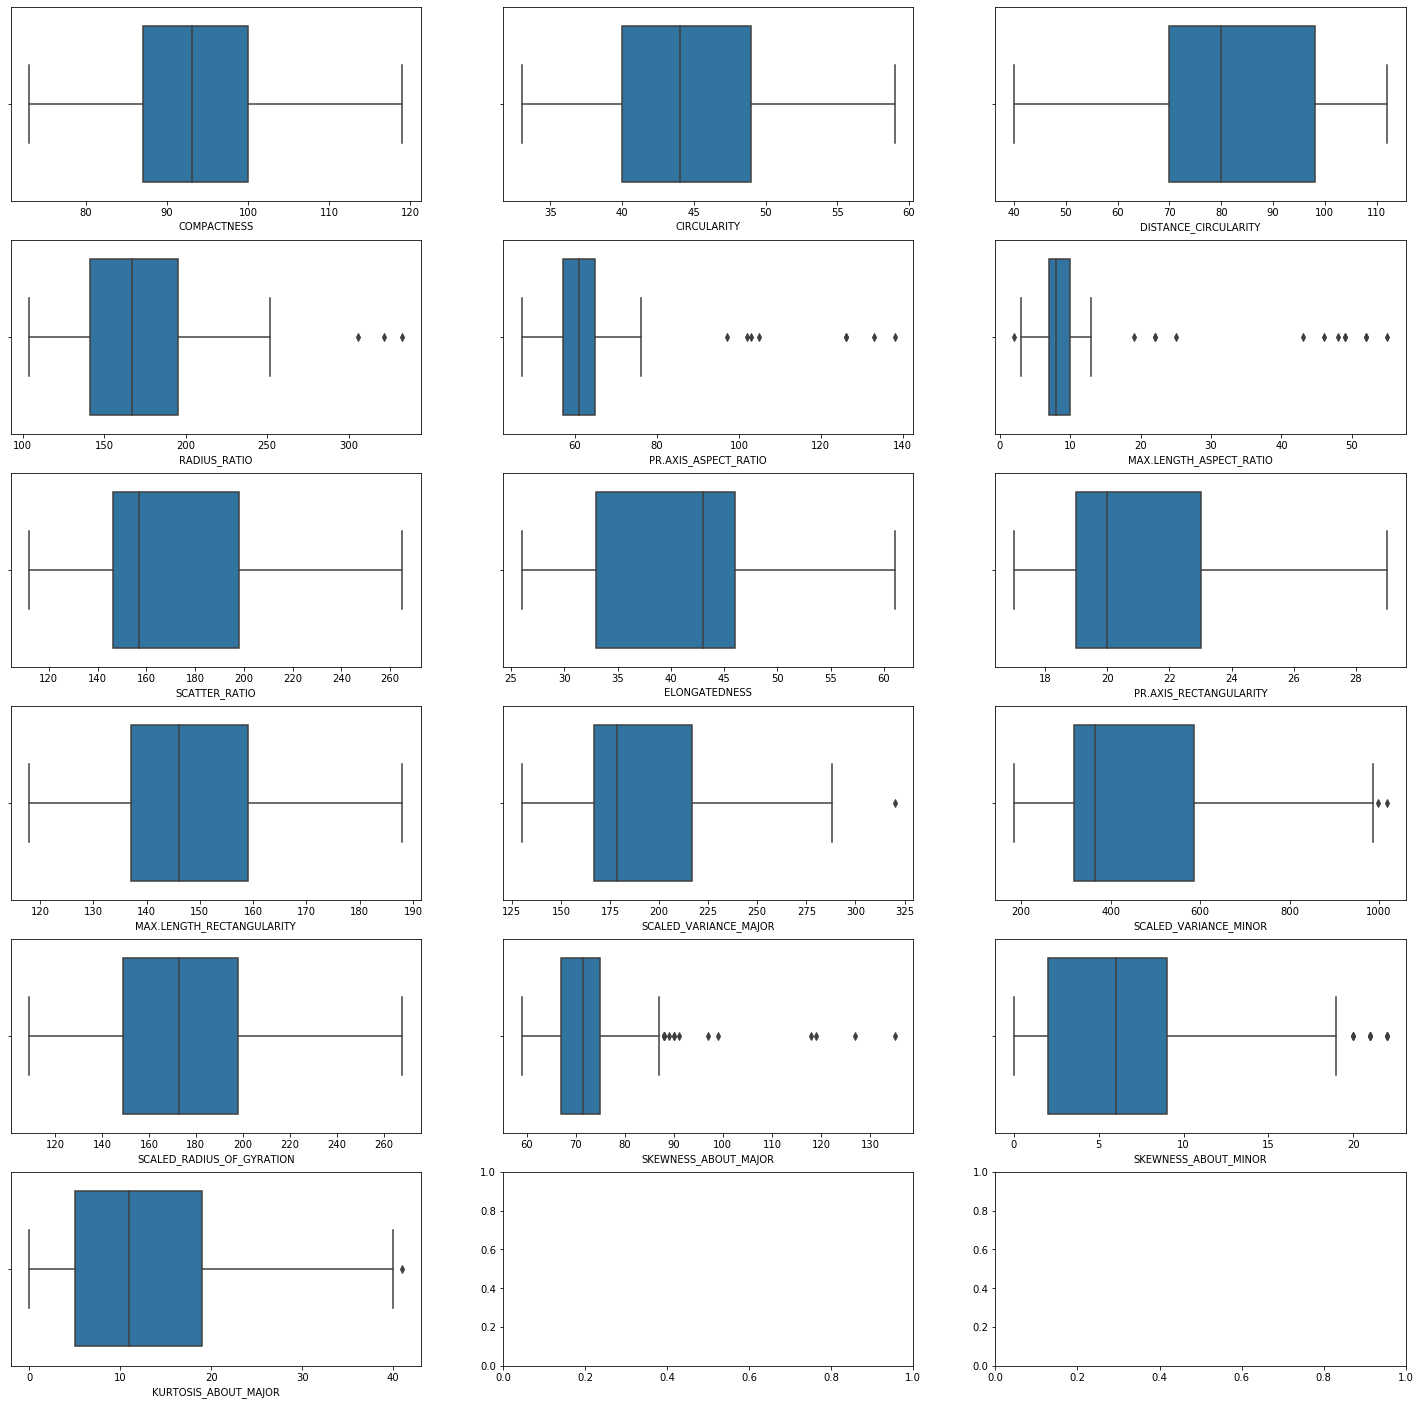

In [6]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25, 25))
for i, column in enumerate(feature_cols):
    sns.boxplot(df[column],ax=axes[i//3,i%3], dodge=False, whis=1.5)

**Removing Outlier Rows**

In [7]:
# Max value based on boxplot to filter outliers of 8 columns where outliers are identified. 
df_columns_with_outliers = pd.DataFrame([[255, 77, 13, 288, 980, 88, 19, 40]], columns=['RADIUS_RATIO', 
                                                                                'PR.AXIS_ASPECT_RATIO', 
                                                                                'MAX.LENGTH_ASPECT_RATIO', 
                                                                                'SCALED_VARIANCE_MAJOR', 
                                                                                'SCALED_VARIANCE_MINOR', 
                                                                                'SKEWNESS_ABOUT_MAJOR', 
                                                                                'SKEWNESS_ABOUT_MINOR', 
                                                                                'KURTOSIS_ABOUT_MAJOR'])

total_outliers = 0
for i, column in enumerate(df_columns_with_outliers.columns):
    total_outliers += df[column][df[column] > df_columns_with_outliers[column][0]].size
print('Out of {} rows {} Outliers '.format(len(df.index), total_outliers))

Out of 846 rows 51 Outliers 


In [8]:
from sklearn.linear_model import LinearRegression

def fix_outlier_with_mean(df):   
    data_df = df.copy()

    # Fill null
    data_df.fillna(data_df.mean(), inplace=True)

    # Replace outliers with mean value. Mean is calculated with data rows excluding outliers
    for i, column in enumerate(df_columns_with_outliers.columns):
        data_df.loc[data_df[column] > df_columns_with_outliers[column][0], column] = data_df[data_df[column] <= df_columns_with_outliers[column][0]][column].mean()

    data_df['Class'] = pd.Categorical(data_df['Class']).codes
    
    return data_df

def fix_outlier_with_boundary_value(data_df):    

    # Fill null
    data_df.fillna(data_df.mean(), inplace=True)

    # Replace outliers with max boundary value
    for i, column in enumerate(df_columns_with_outliers.columns):
        data_df.loc[data_df[column] > df_columns_with_outliers[column][0], column] = df_columns_with_outliers[column][0]
        
    data_df['Class'] = pd.Categorical(data_df['Class']).codes
    
    return data_df

def remove_outliers(data_df):
    
    # Fill null
    data_df.fillna(data_df.mean(), inplace=True)

    # Remove outliers based on max value identified earlier from boxplot
    for i, column in enumerate(df_columns_with_outliers.columns):
        data_df = data_df[data_df[column] < df_columns_with_outliers[column][0]]

    data_df['Class'] = pd.Categorical(data_df['Class']).codes
    
    return data_df
df_new = remove_outliers(df)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   COMPACTNESS                803 non-null    int64
 1   CIRCULARITY                803 non-null    int64
 2   DISTANCE_CIRCULARITY       803 non-null    int64
 3   RADIUS_RATIO               803 non-null    int64
 4   PR.AXIS_ASPECT_RATIO       803 non-null    int64
 5   MAX.LENGTH_ASPECT_RATIO    803 non-null    int64
 6   SCATTER_RATIO              803 non-null    int64
 7   ELONGATEDNESS              803 non-null    int64
 8   PR.AXIS_RECTANGULARITY     803 non-null    int64
 9   MAX.LENGTH_RECTANGULARITY  803 non-null    int64
 10  SCALED_VARIANCE_MAJOR      803 non-null    int64
 11  SCALED_VARIANCE_MINOR      803 non-null    int64
 12  SCALED_RADIUS_OF_GYRATION  803 non-null    int64
 13  SKEWNESS_ABOUT_MAJOR       803 non-null    int64
 14  SKEWNESS_ABOUT_MINOR      

In [9]:
df_new.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
COMPACTNESS,803.0,93.52,8.03,73.0,87.0,93.0,100.0,116.0
CIRCULARITY,803.0,44.76,6.10,33.0,40.0,44.0,49.0,59.0
DISTANCE_CIRCULARITY,803.0,82.00,15.53,40.0,70.0,80.0,98.0,112.0
RADIUS_RATIO,803.0,167.69,31.58,104.0,141.0,166.0,194.0,246.0
PR.AXIS_ASPECT_RATIO,803.0,61.20,5.65,47.0,57.0,61.0,65.0,76.0
MAX.LENGTH_ASPECT_RATIO,803.0,8.10,2.03,3.0,7.0,8.0,10.0,12.0
SCATTER_RATIO,803.0,168.40,32.46,112.0,146.0,157.0,197.5,257.0
ELONGATEDNESS,803.0,40.97,7.69,26.0,33.0,43.0,46.0,61.0
PR.AXIS_RECTANGULARITY,803.0,20.55,2.52,17.0,19.0,20.0,23.0,28.0
MAX.LENGTH_RECTANGULARITY,803.0,147.76,14.32,118.0,137.0,146.0,159.0,186.0


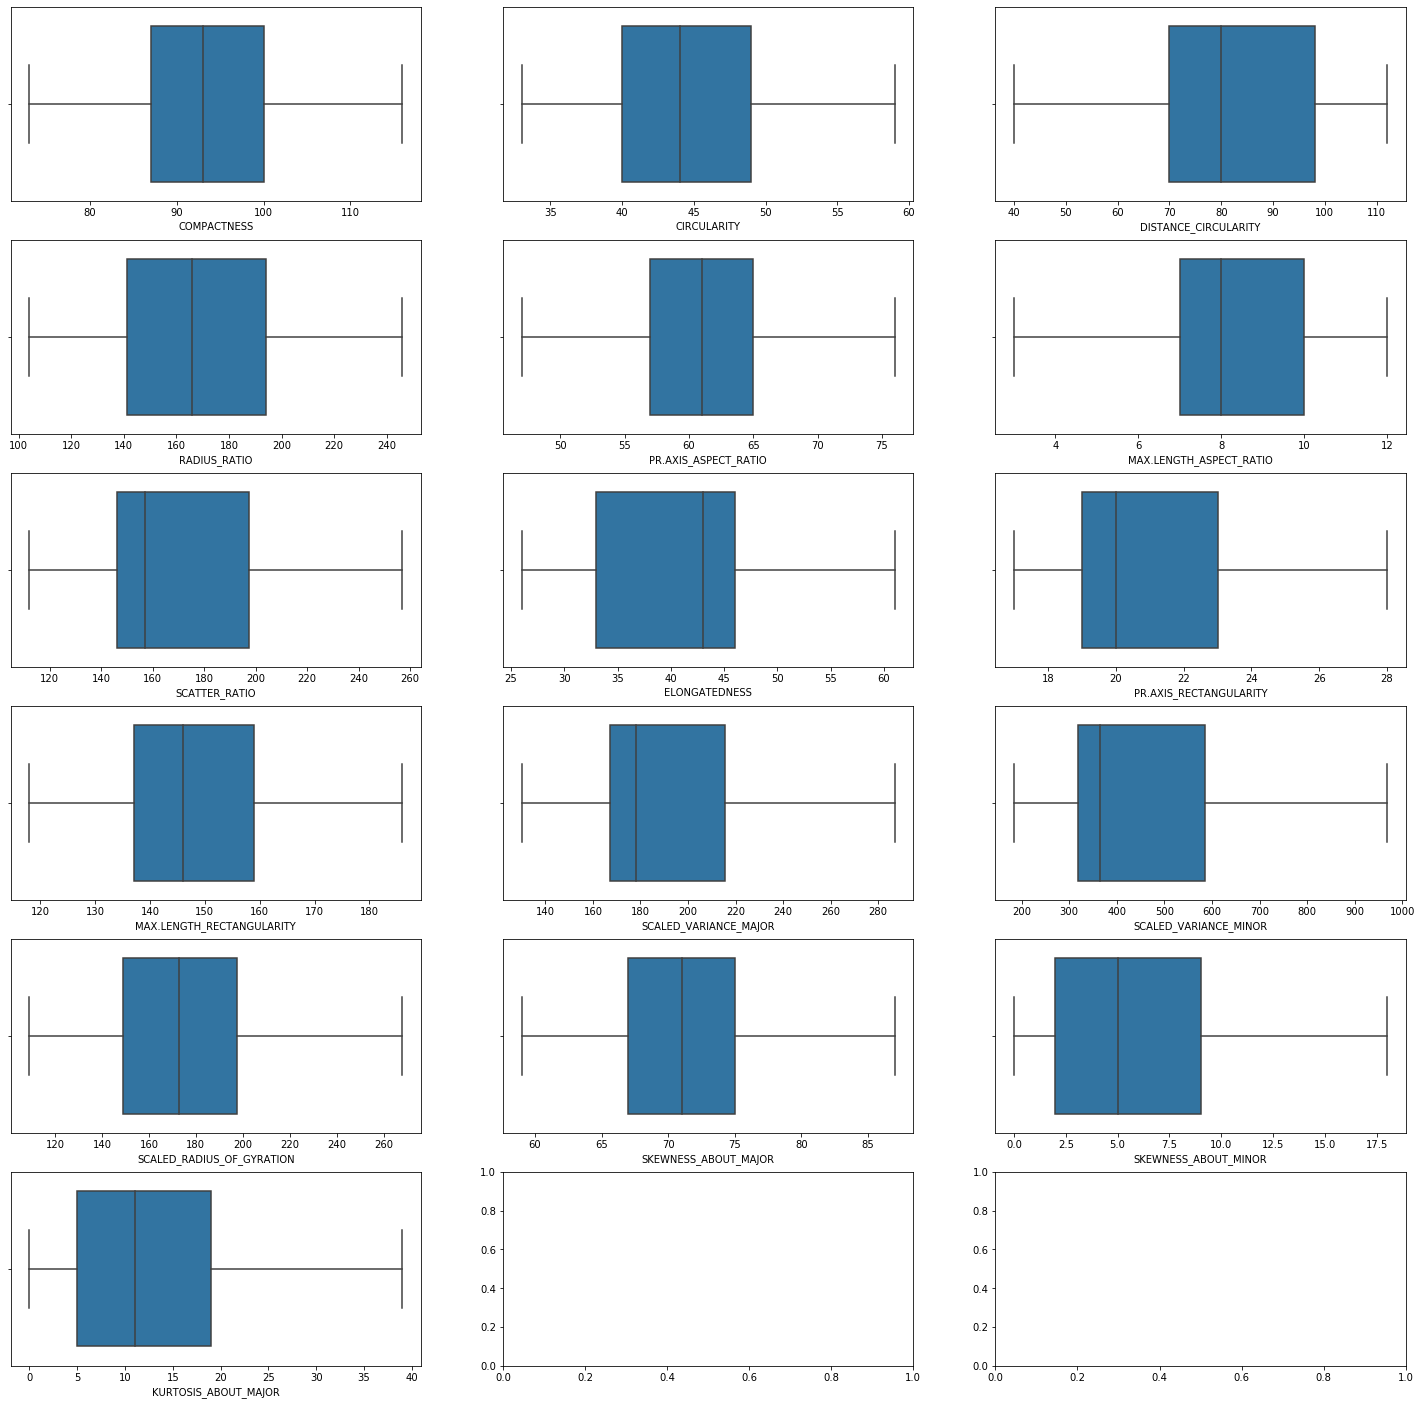

In [10]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25, 25))
for i, column in enumerate(feature_cols):
    sns.boxplot(df_new[column],ax=axes[i//3,i%3], dodge=False, whis=1.5)

In [11]:
df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   COMPACTNESS                803 non-null    int64
 1   CIRCULARITY                803 non-null    int64
 2   DISTANCE_CIRCULARITY       803 non-null    int64
 3   RADIUS_RATIO               803 non-null    int64
 4   PR.AXIS_ASPECT_RATIO       803 non-null    int64
 5   MAX.LENGTH_ASPECT_RATIO    803 non-null    int64
 6   SCATTER_RATIO              803 non-null    int64
 7   ELONGATEDNESS              803 non-null    int64
 8   PR.AXIS_RECTANGULARITY     803 non-null    int64
 9   MAX.LENGTH_RECTANGULARITY  803 non-null    int64
 10  SCALED_VARIANCE_MAJOR      803 non-null    int64
 11  SCALED_VARIANCE_MINOR      803 non-null    int64
 12  SCALED_RADIUS_OF_GYRATION  803 non-null    int64
 13  SKEWNESS_ABOUT_MAJOR       803 non-null    int64
 14  SKEWNESS_ABOUT_MINOR      

In [14]:
df_new.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
COMPACTNESS,803.0,93.52,8.03,73.0,87.0,93.0,100.0,116.0
CIRCULARITY,803.0,44.76,6.10,33.0,40.0,44.0,49.0,59.0
DISTANCE_CIRCULARITY,803.0,82.00,15.53,40.0,70.0,80.0,98.0,112.0
RADIUS_RATIO,803.0,167.69,31.58,104.0,141.0,166.0,194.0,246.0
PR.AXIS_ASPECT_RATIO,803.0,61.20,5.65,47.0,57.0,61.0,65.0,76.0
MAX.LENGTH_ASPECT_RATIO,803.0,8.10,2.03,3.0,7.0,8.0,10.0,12.0
SCATTER_RATIO,803.0,168.40,32.46,112.0,146.0,157.0,197.5,257.0
ELONGATEDNESS,803.0,40.97,7.69,26.0,33.0,43.0,46.0,61.0
PR.AXIS_RECTANGULARITY,803.0,20.55,2.52,17.0,19.0,20.0,23.0,28.0
MAX.LENGTH_RECTANGULARITY,803.0,147.76,14.32,118.0,137.0,146.0,159.0,186.0


In [15]:
df_new[df_new['PR.AXIS_ASPECT_RATIO'] > 76].sort_values(by=['PR.AXIS_ASPECT_RATIO'], ascending=False)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class


**Tran/Test Split Testing**

We will run the training on our model by using different test-train split ratio and check the variation in accuracy. We want to check if the ratio has any relationship with the performance(accuracy) of the model.




In [16]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

X_new = df_new[feature_cols]
y_new = df_new[label_col]

# Initialize Scaler
scaler = MinMaxScaler()

# Estimator - SVM
estimator_svm = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# Disable console messages
estimator_svm.verbose = False

# Run the test and print the results
result_df = test_train_split(estimator_svm, X_new, y_new.values.ravel(), scaler)


/home/shashig/anaconda3/envs/presc/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/shashig/anaconda3/envs/presc/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/shashig/anaconda3/envs/presc/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/shashig/anaconda3/envs/presc

    Ratio(Train Data)  Ratio(Test Data)  Accuracy  F1-Score
0                0.90              0.10      0.72      0.71
1                0.85              0.15      0.70      0.69
2                0.80              0.20      0.73      0.72
3                0.75              0.25      0.75      0.74
4                0.70              0.30      0.77      0.77
5                0.65              0.35      0.76      0.76
6                0.60              0.40      0.77      0.76
7                0.55              0.45      0.77      0.77
8                0.50              0.50      0.73      0.70
9                0.45              0.55      0.74      0.74
10               0.40              0.60      0.75      0.75
11               0.35              0.65      0.75      0.74
12               0.30              0.70      0.71      0.66
13               0.25              0.75      0.73      0.71
14               0.20              0.80      0.69      0.60
15               0.15              0.85 

/home/shashig/anaconda3/envs/presc/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/shashig/anaconda3/envs/presc/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
result_df

,Ratio(Train Data),Ratio(Test Data),Accuracy,F1-Score
0,0.90,0.10,0.72,0.71
1,0.85,0.15,0.70,0.69
2,0.80,0.20,0.73,0.72
3,0.75,0.25,0.75,0.74
4,0.70,0.30,0.77,0.77
5,0.65,0.35,0.76,0.76
6,0.60,0.40,0.77,0.76
7,0.55,0.45,0.77,0.77
8,0.50,0.50,0.73,0.70
9,0.45,0.55,0.74,0.74


**Result**

From the above table, we can see that test/train data ratio does affect the accuray of the model. Highest accuracy that we get for this data and this setup is 83% when we use 70/30 Train/Test ratio.

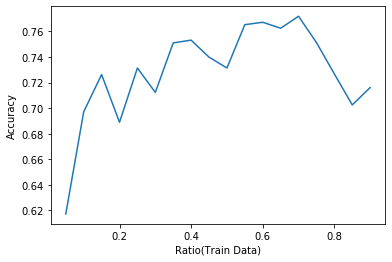

In [18]:
sns.lineplot(data=result_df, x='Ratio(Train Data)', y='Accuracy')

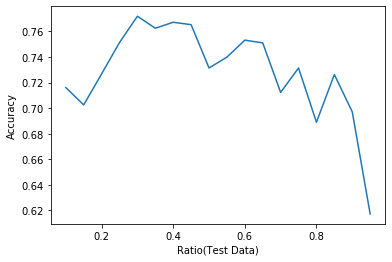

In [19]:
sns.lineplot(data=result_df, x='Ratio(Test Data)', y='Accuracy')

Based on the above experiment, changes in the split ratio did have effect on model accuracy. In the above two graphs, we can see the rise in the accuracy when we gradually increase the size of the train data by 5% in each round even though its not linear and viceversa.